In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn import metrics
from sklearn.datasets import load_digits

import tensorflow
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist

import random

In [43]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

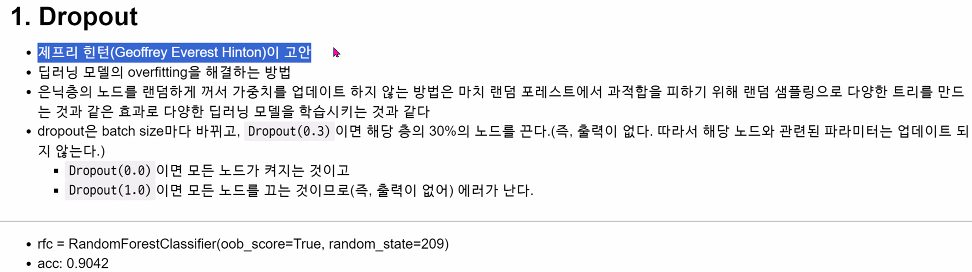

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [47]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

index: 4444 img의 숫자 0


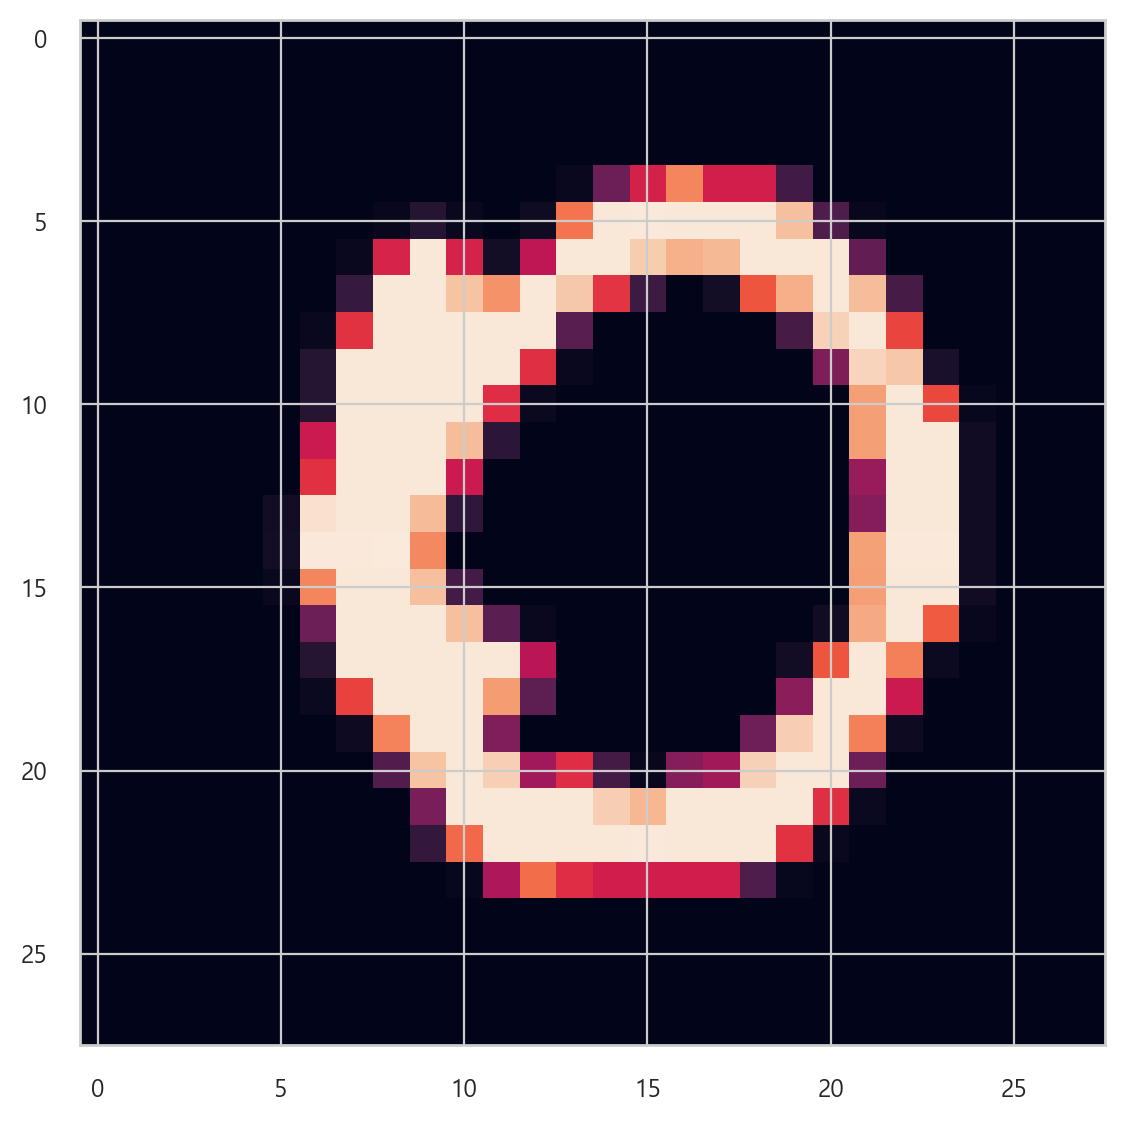

In [48]:
i = 4444
plt.imshow(x_train[i])
print("index:",i,"img의 숫자", y_train[i])

In [49]:
x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

In [50]:
x_train_re = np.reshape(x_train,(x_train.shape[0], 28*28))
x_test_re = np.reshape(x_test,(x_test.shape[0], 28*28))

In [51]:
y_train = to_categorical(y_train)

In [52]:
print(x_train_re.shape)
print(y_train.shape)
print(x_test_re.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


In [53]:
random.seed(42)

input_shape = 28 * 28
output_shape = 10

first_hidden = 128
secod_hidden = 64

#모델
model_mnist = Sequential(name= "Mnist_classifier")
model_mnist.add(Dense(first_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",
                      input_shape=(input_shape,)))

model_mnist.add(Dense(secod_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",))

model_mnist.add(Dense(output_shape,
                      kernel_initializer = "he_normal",
                      activation = "softmax",
                      input_shape=(input_shape,)))

In [54]:
adam = Adam(learning_rate=0.001)

model_mnist.compile(loss="categorical_crossentropy",
                    optimizer = adam,
                    metrics=["accuracy"]) # 분류문제에서는 이정보가 있어야 정확도를 확인한다.

In [55]:
model_mnist_hist = model_mnist.fit(x_train_re,y_train,
                                   epochs=10,
                                   batch_size=200,
                                   validation_split=0.2,
                                   verbose = 2)

Epoch 1/10
240/240 - 1s - loss: 0.4212 - accuracy: 0.8811 - val_loss: 0.1875 - val_accuracy: 0.9477 - 1s/epoch - 6ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1634 - accuracy: 0.9530 - val_loss: 0.1370 - val_accuracy: 0.9606 - 540ms/epoch - 2ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1147 - accuracy: 0.9668 - val_loss: 0.1114 - val_accuracy: 0.9683 - 528ms/epoch - 2ms/step
Epoch 4/10
240/240 - 1s - loss: 0.0871 - accuracy: 0.9746 - val_loss: 0.1023 - val_accuracy: 0.9698 - 551ms/epoch - 2ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0690 - accuracy: 0.9799 - val_loss: 0.0942 - val_accuracy: 0.9725 - 518ms/epoch - 2ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0906 - val_accuracy: 0.9738 - 513ms/epoch - 2ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0442 - accuracy: 0.9872 - val_loss: 0.0904 - val_accuracy: 0.9718 - 512ms/epoch - 2ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0891 - val_accuracy: 0.9736 - 539ms/epoch - 2ms/step
Epo

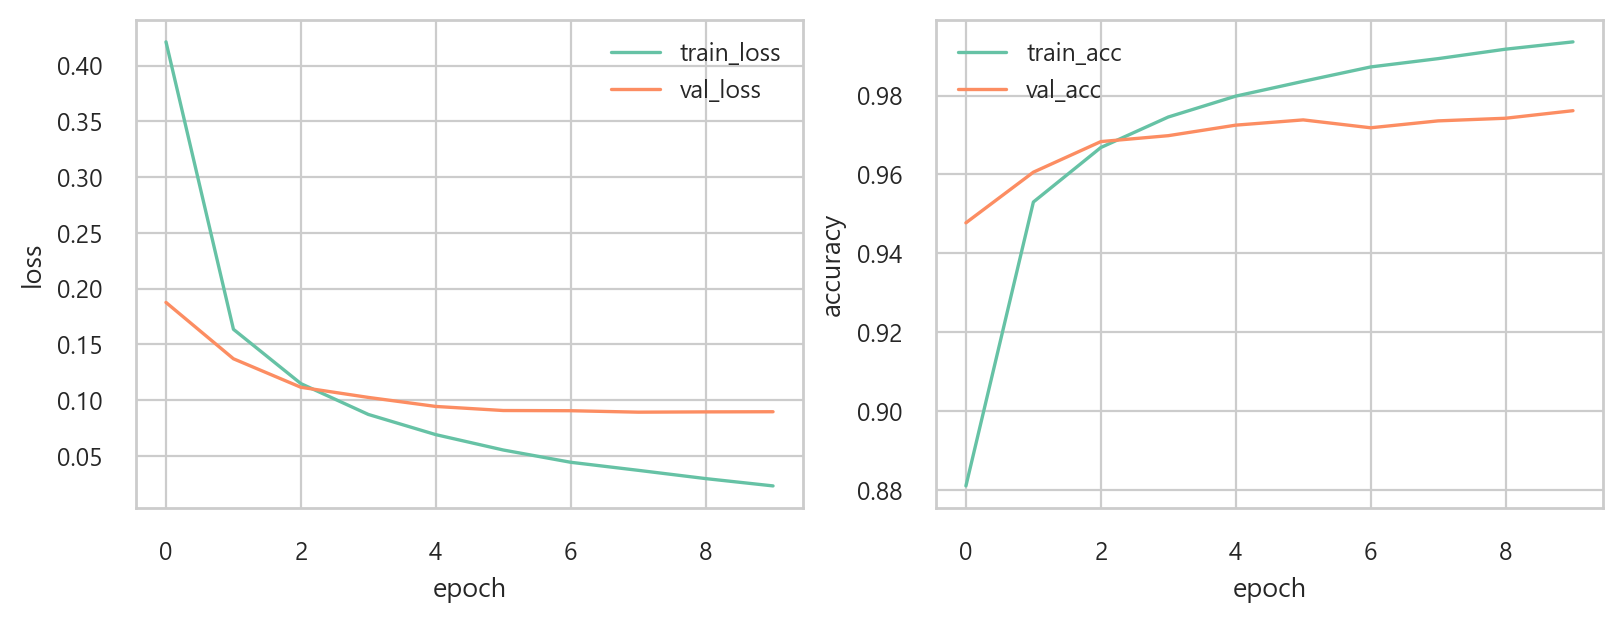

In [56]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(model_mnist_hist.history["loss"], label="train_loss")
ax_loss.plot(model_mnist_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch", ylabel = "loss")
ax_loss.legend()

ax_acc.plot(model_mnist_hist.history["accuracy"], label="train_acc")
ax_acc.plot(model_mnist_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch", ylabel = "accuracy")
ax_acc.legend();

In [57]:
metrics.accuracy_score([np.argmax(i) for i in model_mnist.predict(x_test_re)], y_test)

313/313 [==============================] - 0s 1ms/step


0.9773

In [58]:
random.seed(42)

input_shape = 28 * 28
output_shape = 10

first_hidden = 128
secod_hidden = 64

#모델
model_mnist_dropout = Sequential(name= "Mnist_classifier_dropout")
model_mnist_dropout.add(Dense(first_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",
                      input_shape=(input_shape,)))
model_mnist_dropout.add(Dropout(0.3)),
model_mnist_dropout.add(Dense(secod_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",))
model_mnist_dropout.add(Dropout(0.3)),
model_mnist_dropout.add(Dense(output_shape,
                      kernel_initializer = "he_normal",
                      activation = "softmax",
                      input_shape=(input_shape,)))

adam = Adam(learning_rate=0.001)

model_mnist_dropout.compile(loss="categorical_crossentropy",
                    optimizer = adam,
                    metrics=["accuracy"]) # 분류문제에서는 이정보가 있어야 정확도를 확인한다.

model_mnist_dropout_hist = model_mnist_dropout.fit(x_train_re,y_train,
                                   epochs=10,
                                   batch_size=200,
                                   validation_split=0.2,
                                   verbose = 1)

Epoch 1/10
240/240 [==============================] - 1s 4ms/step - loss: 0.6854 - accuracy: 0.7877 - val_loss: 0.2275 - val_accuracy: 0.9362
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9120 - val_loss: 0.1600 - val_accuracy: 0.9530
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.9314 - val_loss: 0.1329 - val_accuracy: 0.9613
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.1925 - accuracy: 0.9432 - val_loss: 0.1208 - val_accuracy: 0.9662
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.1668 - accuracy: 0.9508 - val_loss: 0.1063 - val_accuracy: 0.9689
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.1482 - accuracy: 0.9555 - val_loss: 0.0967 - val_accuracy: 0.9707
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9603 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 

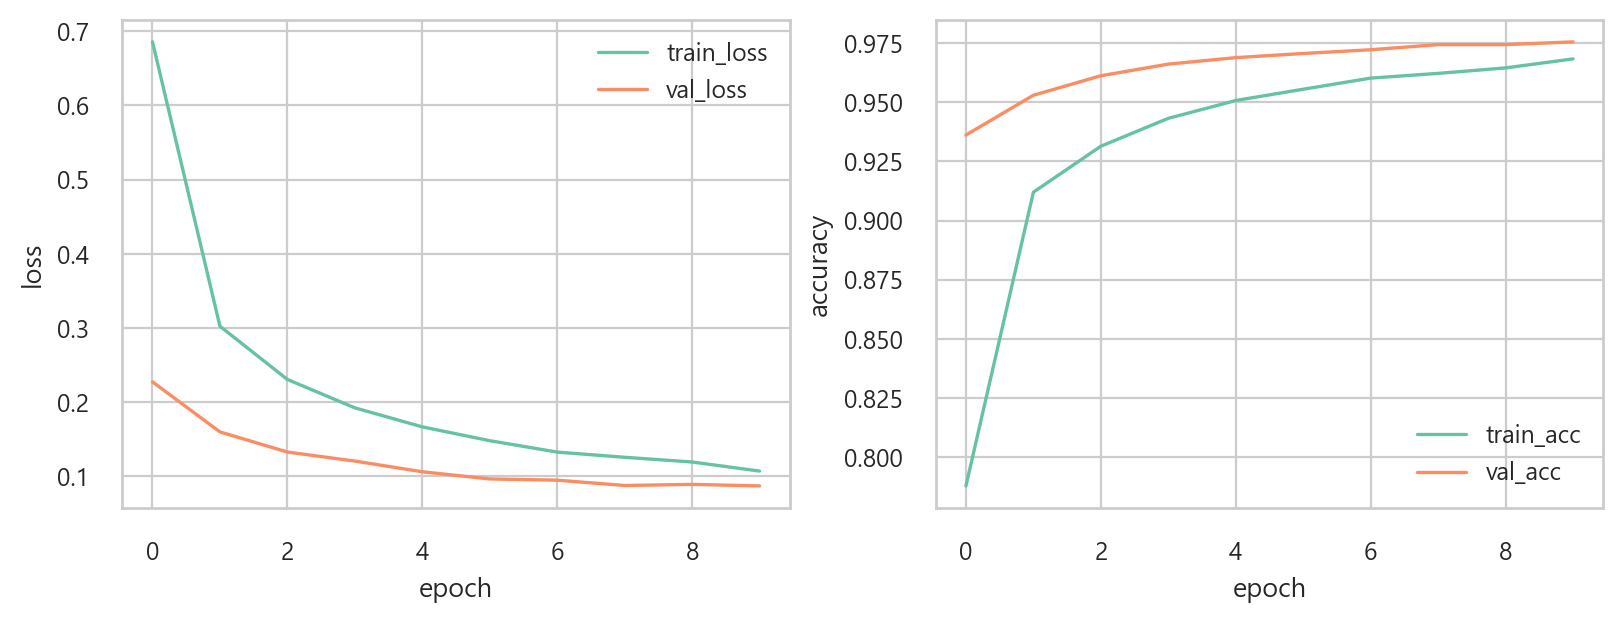

In [59]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(model_mnist_dropout_hist.history["loss"], label="train_loss")
ax_loss.plot(model_mnist_dropout_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch", ylabel = "loss")
ax_loss.legend()

ax_acc.plot(model_mnist_dropout_hist.history["accuracy"], label="train_acc")
ax_acc.plot(model_mnist_dropout_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch", ylabel = "accuracy")
ax_acc.legend();

In [60]:
random.seed(42)

input_shape = 28 * 28
output_shape = 10

first_hidden = 128
secod_hidden = 64

#모델
model_mnist_dropout = Sequential(name= "Mnist_classifier_dropout")
model_mnist_dropout.add(Dense(first_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",
                      input_shape=(input_shape,)))
model_mnist_dropout.add(Dropout(0.3)),
model_mnist_dropout.add(Dense(secod_hidden,
                      kernel_initializer = "he_normal",
                      activation = "relu",))
model_mnist_dropout.add(Dropout(0.3)),
model_mnist_dropout.add(Dense(output_shape,
                      kernel_initializer = "he_normal",
                      activation = "softmax",
                      input_shape=(input_shape,)))

adam = Adam(learning_rate=0.001)
ada_b = tfa.optimizers.AdaBelief()

model_mnist_dropout.compile(loss="categorical_crossentropy",
                    optimizer = ada_b,
                    metrics=["accuracy"]) # 분류문제에서는 이정보가 있어야 정확도를 확인한다.

model_mnist_dropout_hist = model_mnist_dropout.fit(x_train_re,y_train,
                                   epochs=10,
                                   batch_size=200,
                                   validation_split=0.2,
                                   verbose = 1)

Epoch 1/10
240/240 [==============================] - 3s 8ms/step - loss: 1.3405 - accuracy: 0.5621 - val_loss: 0.3856 - val_accuracy: 0.9027
Epoch 2/10
240/240 [==============================] - 2s 7ms/step - loss: 0.4785 - accuracy: 0.8585 - val_loss: 0.2346 - val_accuracy: 0.9323
Epoch 3/10
240/240 [==============================] - 2s 7ms/step - loss: 0.3310 - accuracy: 0.9038 - val_loss: 0.1790 - val_accuracy: 0.9487
Epoch 4/10
240/240 [==============================] - 2s 7ms/step - loss: 0.2596 - accuracy: 0.9255 - val_loss: 0.1452 - val_accuracy: 0.9574
Epoch 5/10
240/240 [==============================] - 2s 6ms/step - loss: 0.2183 - accuracy: 0.9362 - val_loss: 0.1289 - val_accuracy: 0.9623
Epoch 6/10
240/240 [==============================] - 2s 6ms/step - loss: 0.1886 - accuracy: 0.9452 - val_loss: 0.1150 - val_accuracy: 0.9660
Epoch 7/10
240/240 [==============================] - 1s 6ms/step - loss: 0.1697 - accuracy: 0.9493 - val_loss: 0.1067 - val_accuracy: 0.9682
Epoch 

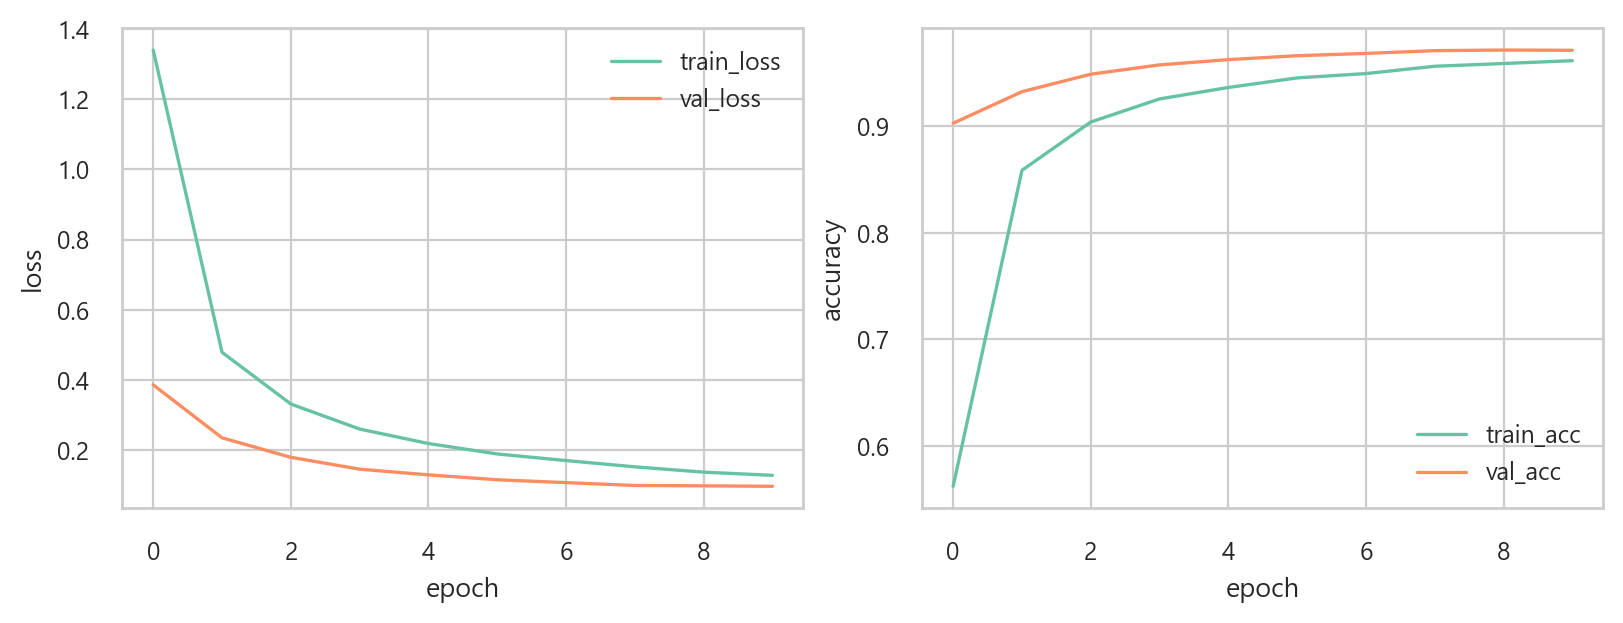

In [66]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(model_mnist_dropout_hist.history["loss"], label="train_loss")
ax_loss.plot(model_mnist_dropout_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch", ylabel = "loss")
ax_loss.legend()

ax_acc.plot(model_mnist_dropout_hist.history["accuracy"], label="train_acc")
ax_acc.plot(model_mnist_dropout_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch", ylabel = "accuracy")
ax_acc.legend();

In [67]:
metrics.accuracy_score([np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)], y_test)

313/313 [==============================] - 0s 1ms/step


0.9712

In [68]:
# model_mnist가 틀린 index
pred = [np.argmax(i) for i in model_mnist.predict(x_test_re)]
incor_indx = [i for i in range(len(y_test)) if y_test[i] != pred[i]]

# model_mnist_dropout이 틀린 index
pred_dropout = [np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)]
incor_dropout_indx = [i for i in range(len(y_test)) if y_test[i] != pred_dropout[i]]

# 두 모델이 공통으로 틀린 index
incor = list(set(incor_indx) & set(incor_dropout_indx))

313/313 [==============================] - 0s 998us/step


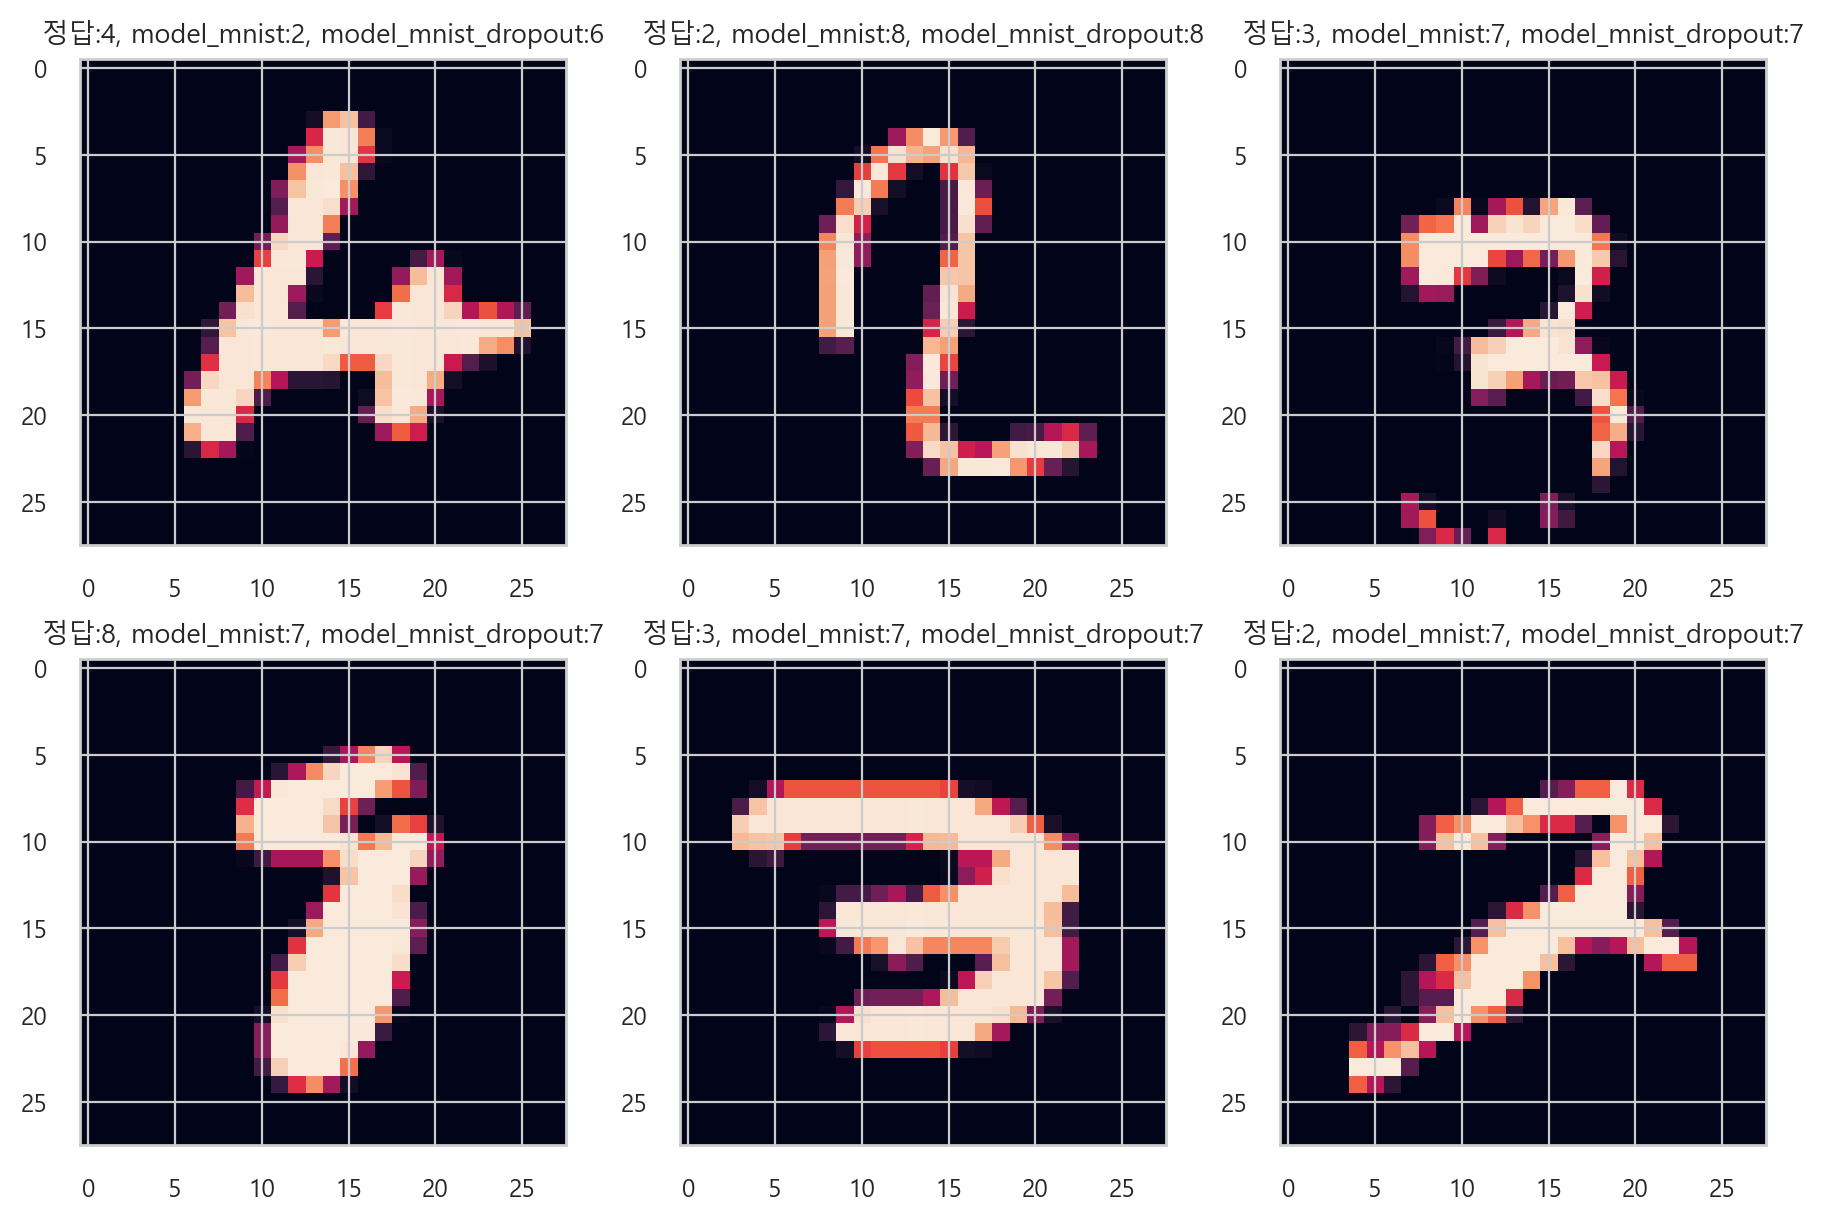

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))

for i, ax in zip(np.random.choice(incor, 6), axes.flat):
    ax.imshow(x_test[i])
    label = y_test[i]
    p_m = pred[i]
    p_d = pred_dropout[i]
    ax.set(title = f"정답:{label}, model_mnist:{p_m}, model_mnist_dropout:{p_d}")

In [70]:
list_of_pred = np.array([np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)])

313/313 [==============================] - 0s 1ms/step


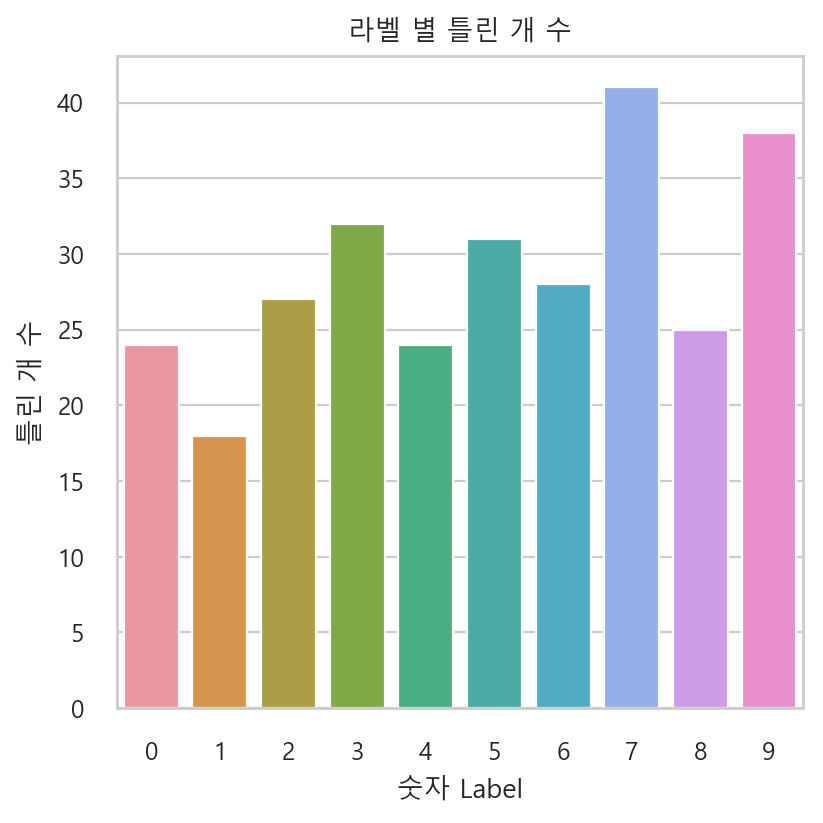

In [71]:
fail_to_pred = list_of_pred[list_of_pred != y_test]
fail_count = np.unique(fail_to_pred,return_counts=True)

fig, ax = plt.subplots(figsize = (4,4))
sns.barplot(x=fail_count[0],
            y=fail_count[1],
            ax=ax)
ax.set(xlabel="숫자 Label", ylabel="틀린 개 수", title="라벨 별 틀린 개 수");